# PDF to text

## [deepdoc](https://github.com/infiniflow/ragflow/tree/main/deepdoc)

`pip install -r requirements.txt`

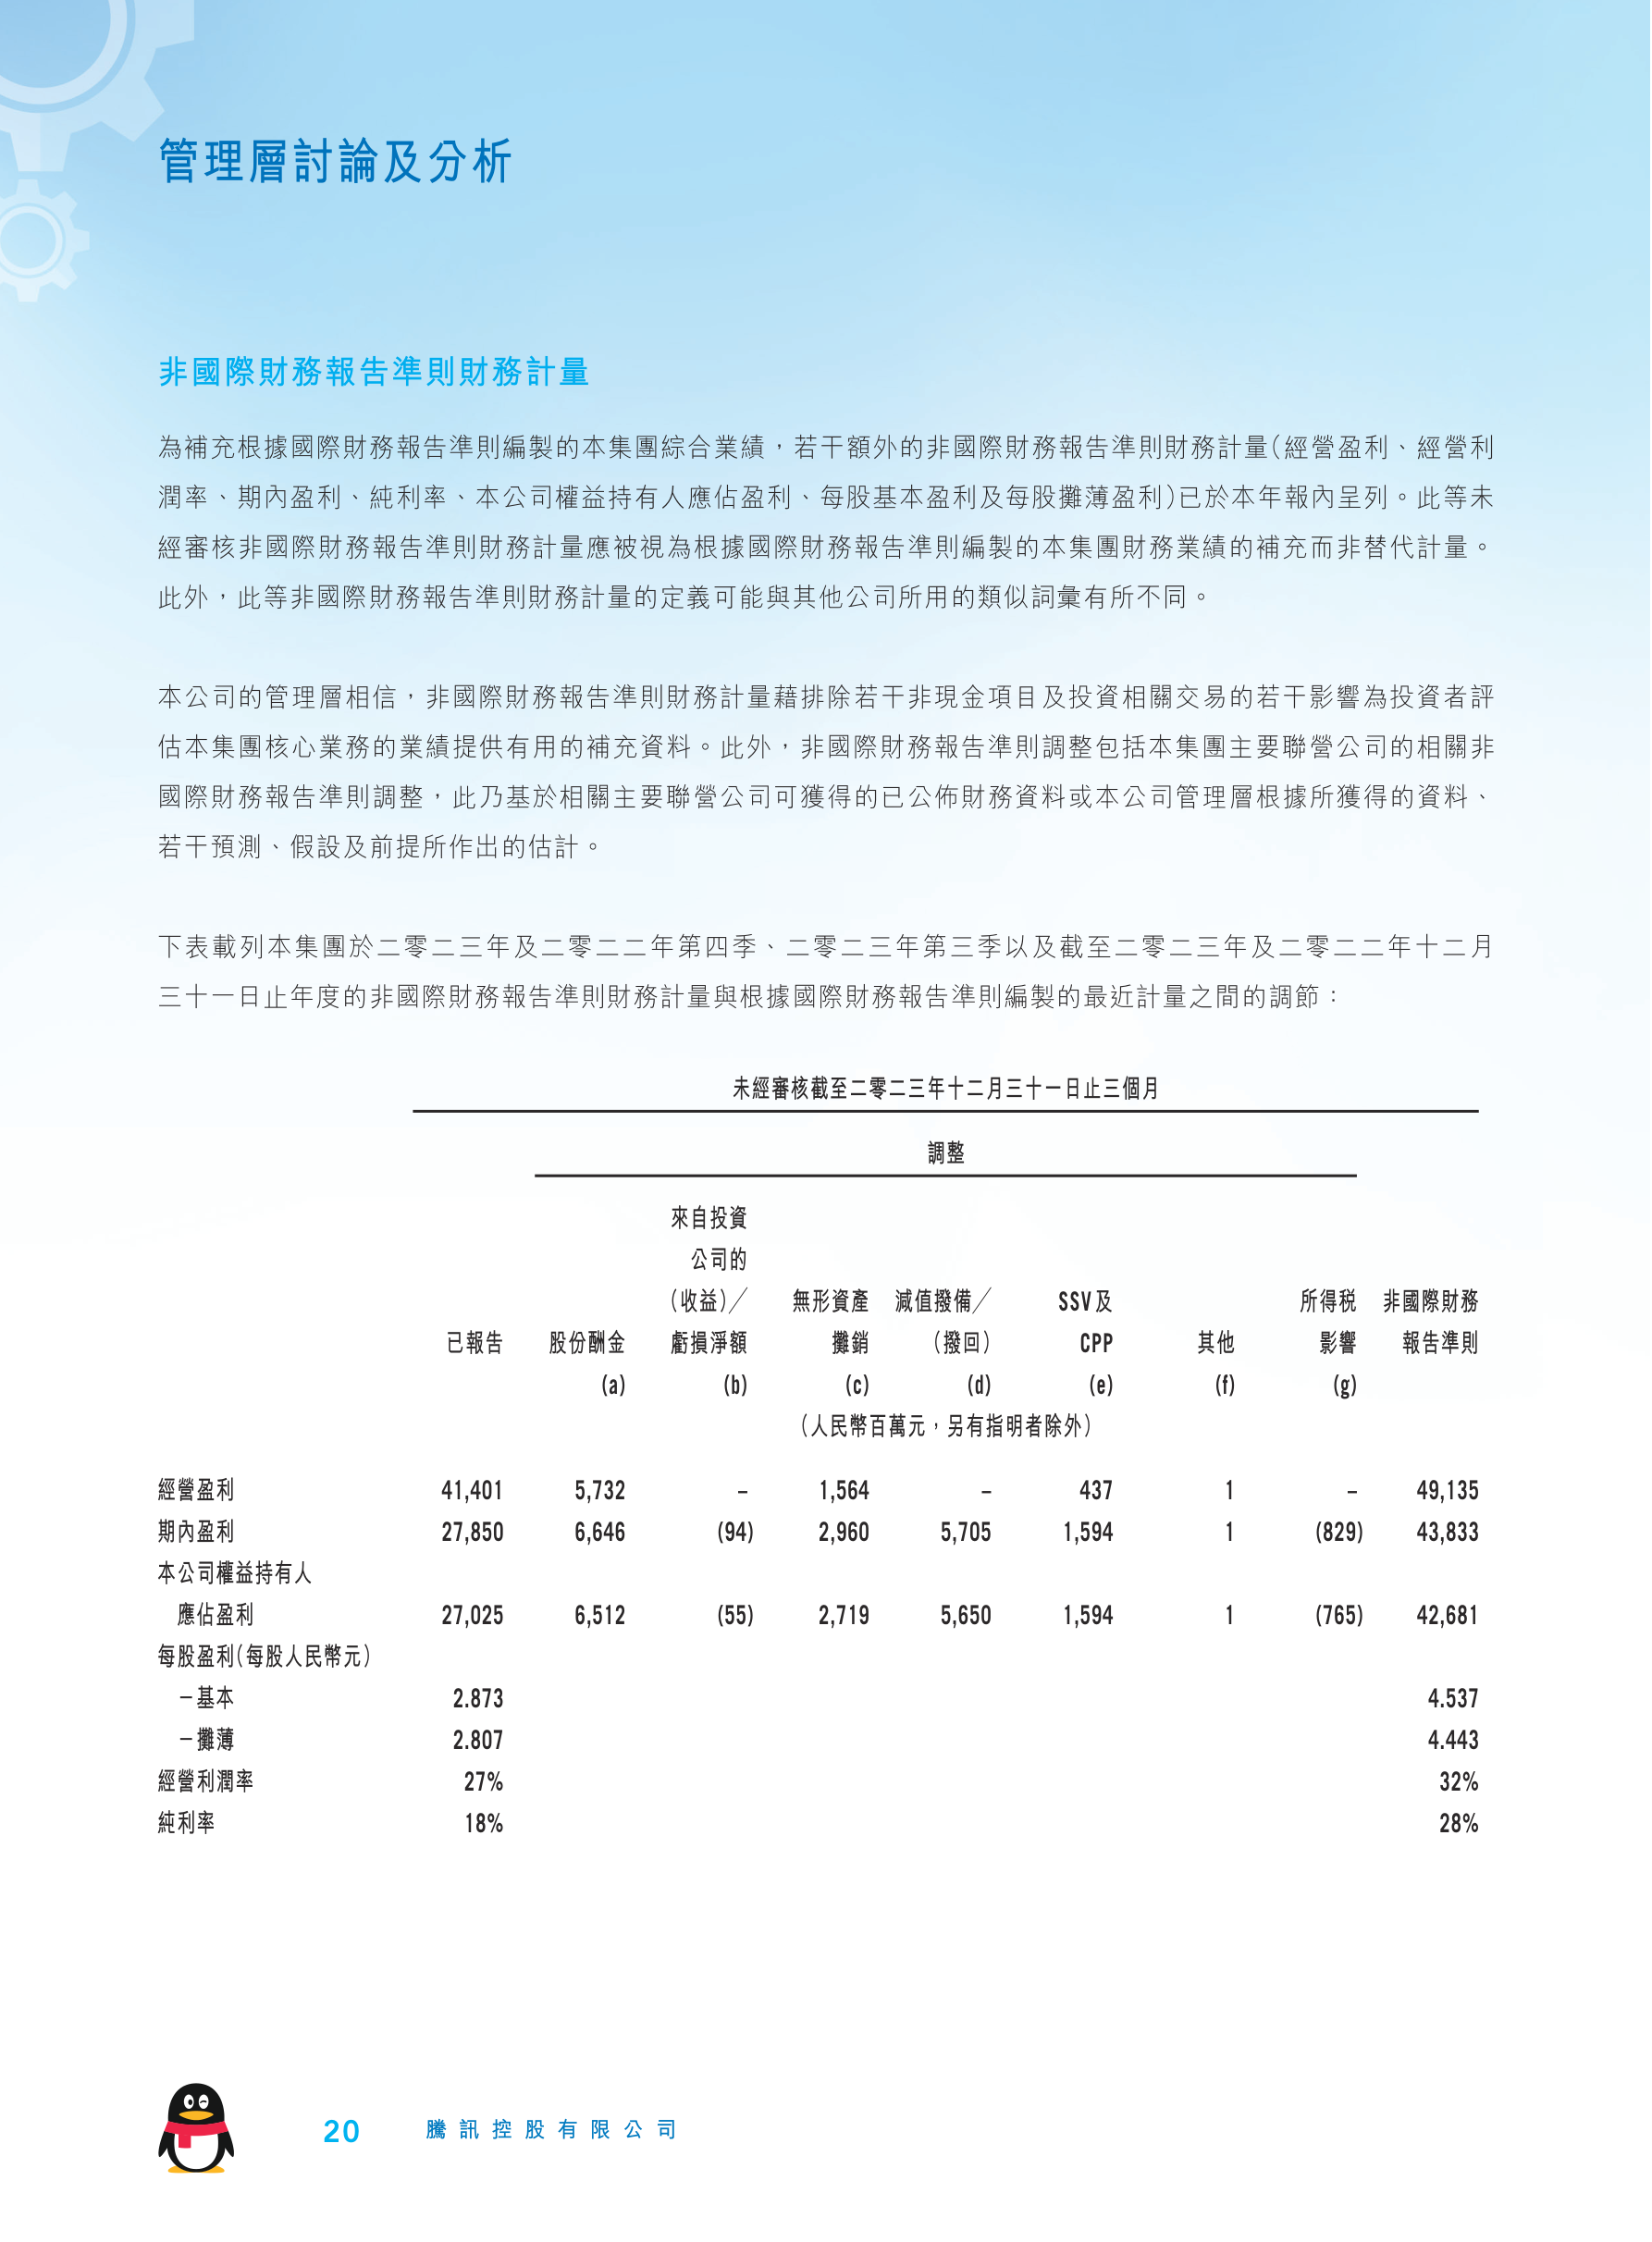

In [22]:
import fitz
import numpy as np
from PIL import Image

filename = "./workspace/0700_2023.pdf"
zoomin = 3
mat = fitz.Matrix(zoomin, zoomin)

pdf = fitz.open(filename)
for i, page in enumerate(pdf):
    pix = page.get_pixmap(matrix=mat)
    img_raw = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    if i == 20:
        break

img_raw

### OCR (原理展示，可跳过)

In [21]:
from pdf_utils.deepdoc import OCR

img = img_raw
ocr = OCR()
bxs = ocr(np.array(img))
bxs

2024-04-11 15:48:14.729 | WARNING  | pdf_utils.deepdoc.ocr:__init__:484 - Trying to download models from huggingface_hub...


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

ocr.res:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

det.onnx:   0%|          | 0.00/4.75M [00:00<?, ?B/s]

layout.paper.onnx:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

tsr.onnx:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

rec.onnx:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

layout.manual.onnx:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

layout.laws.onnx:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

layout.onnx:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

2024-04-11 15:48:24.245 | DEBUG    | pdf_utils.deepdoc.ocr:__call__:609 - dt_boxes num : 81, elapsed : 0.11694502830505371
2024-04-11 15:48:26.640 | DEBUG    | pdf_utils.deepdoc.ocr:__call__:624 - rec_res num  : 81, elapsed : 2.3755598068237305


[([[170.0, 149.0], [553.0, 149.0], [553.0, 199.0], [170.0, 199.0]],
  ('管理層讨及分析', 0.9555755853652954)),
 ([[170.0, 384.0], [637.0, 384.0], [637.0, 419.0], [170.0, 419.0]],
  ('非國際财務報告财務计量', 0.7180159091949463)),
 ([[173.0, 467.0], [1619.0, 467.0], [1619.0, 500.0], [173.0, 500.0]],
  ('為補充根據國際财務報告则製的本集團综合業；若干外的非國際財務報告则財務計量(經營盈利丶經營利', 0.8842268586158752)),
 ([[170.0, 520.0], [1616.0, 520.0], [1616.0, 556.0], [170.0, 556.0]],
  ('潤率丶期内盈利丶純利率丶本公司權益持有人應占盈利丶每股基本盈利及每股薄盈利)已於本年報内呈列。此等未', 0.9556125402450562)),
 ([[170.0, 576.0], [1611.0, 576.0], [1611.0, 609.0], [170.0, 609.0]],
  ('經核非國際財務報告则財務计量應被視為根據國際財務報告则製的本集團財務業的補充而非替代计量。', 0.8745207190513611)),
 ([[167.0, 629.0], [1307.0, 629.0], [1307.0, 662.0], [167.0, 662.0]],
  ('此外，此等非國際財務報告则财務計量的定義可能與其他公司所用的類似有所不同。', 0.9239223599433899)),
 ([[170.0, 737.0], [1616.0, 737.0], [1616.0, 770.0], [170.0, 770.0]],
  ('本公司的管理層相信；非國際財務報告则财務計量藉排除若干非現金目及投資相關交易的若干影響為投資者', 0.9274271130561829)),
 ([[170.0, 790.0], [1616.0, 790.0], [1616.0, 826.0], [170.0, 826.0]]

In [22]:
# 提取识别区域信息
bxs = [(line[0], line[1][0]) for line in bxs]
bxs = [{
    "text": t,
    "bbox": [b[0][0], b[0][1], b[1][0], b[-1][1]],
    "type": "ocr",
    "score": 1} for b, t in bxs if b[0][0] <= b[1][0] and b[0][1] <= b[-1][1]]
bxs

[{'text': '管理層讨及分析',
  'bbox': [170.0, 149.0, 553.0, 199.0],
  'type': 'ocr',
  'score': 1},
 {'text': '非國際财務報告财務计量',
  'bbox': [170.0, 384.0, 637.0, 419.0],
  'type': 'ocr',
  'score': 1},
 {'text': '為補充根據國際财務報告则製的本集團综合業；若干外的非國際財務報告则財務計量(經營盈利丶經營利',
  'bbox': [173.0, 467.0, 1619.0, 500.0],
  'type': 'ocr',
  'score': 1},
 {'text': '潤率丶期内盈利丶純利率丶本公司權益持有人應占盈利丶每股基本盈利及每股薄盈利)已於本年報内呈列。此等未',
  'bbox': [170.0, 520.0, 1616.0, 556.0],
  'type': 'ocr',
  'score': 1},
 {'text': '經核非國際財務報告则財務计量應被視為根據國際財務報告则製的本集團財務業的補充而非替代计量。',
  'bbox': [170.0, 576.0, 1611.0, 609.0],
  'type': 'ocr',
  'score': 1},
 {'text': '此外，此等非國際財務報告则财務計量的定義可能與其他公司所用的類似有所不同。',
  'bbox': [167.0, 629.0, 1307.0, 662.0],
  'type': 'ocr',
  'score': 1},
 {'text': '本公司的管理層相信；非國際財務報告则财務計量藉排除若干非現金目及投資相關交易的若干影響為投資者',
  'bbox': [170.0, 737.0, 1616.0, 770.0],
  'type': 'ocr',
  'score': 1},
 {'text': '估本集團核心業務的業提供有用的補充資料。此外，非國際财務報告则調整包括本集團主要聯營公司的相關非',
  'bbox': [170.0, 790.0, 1616.0, 826.0],
  'type': 'ocr',
  'score': 1},
 {'text': '國際財務

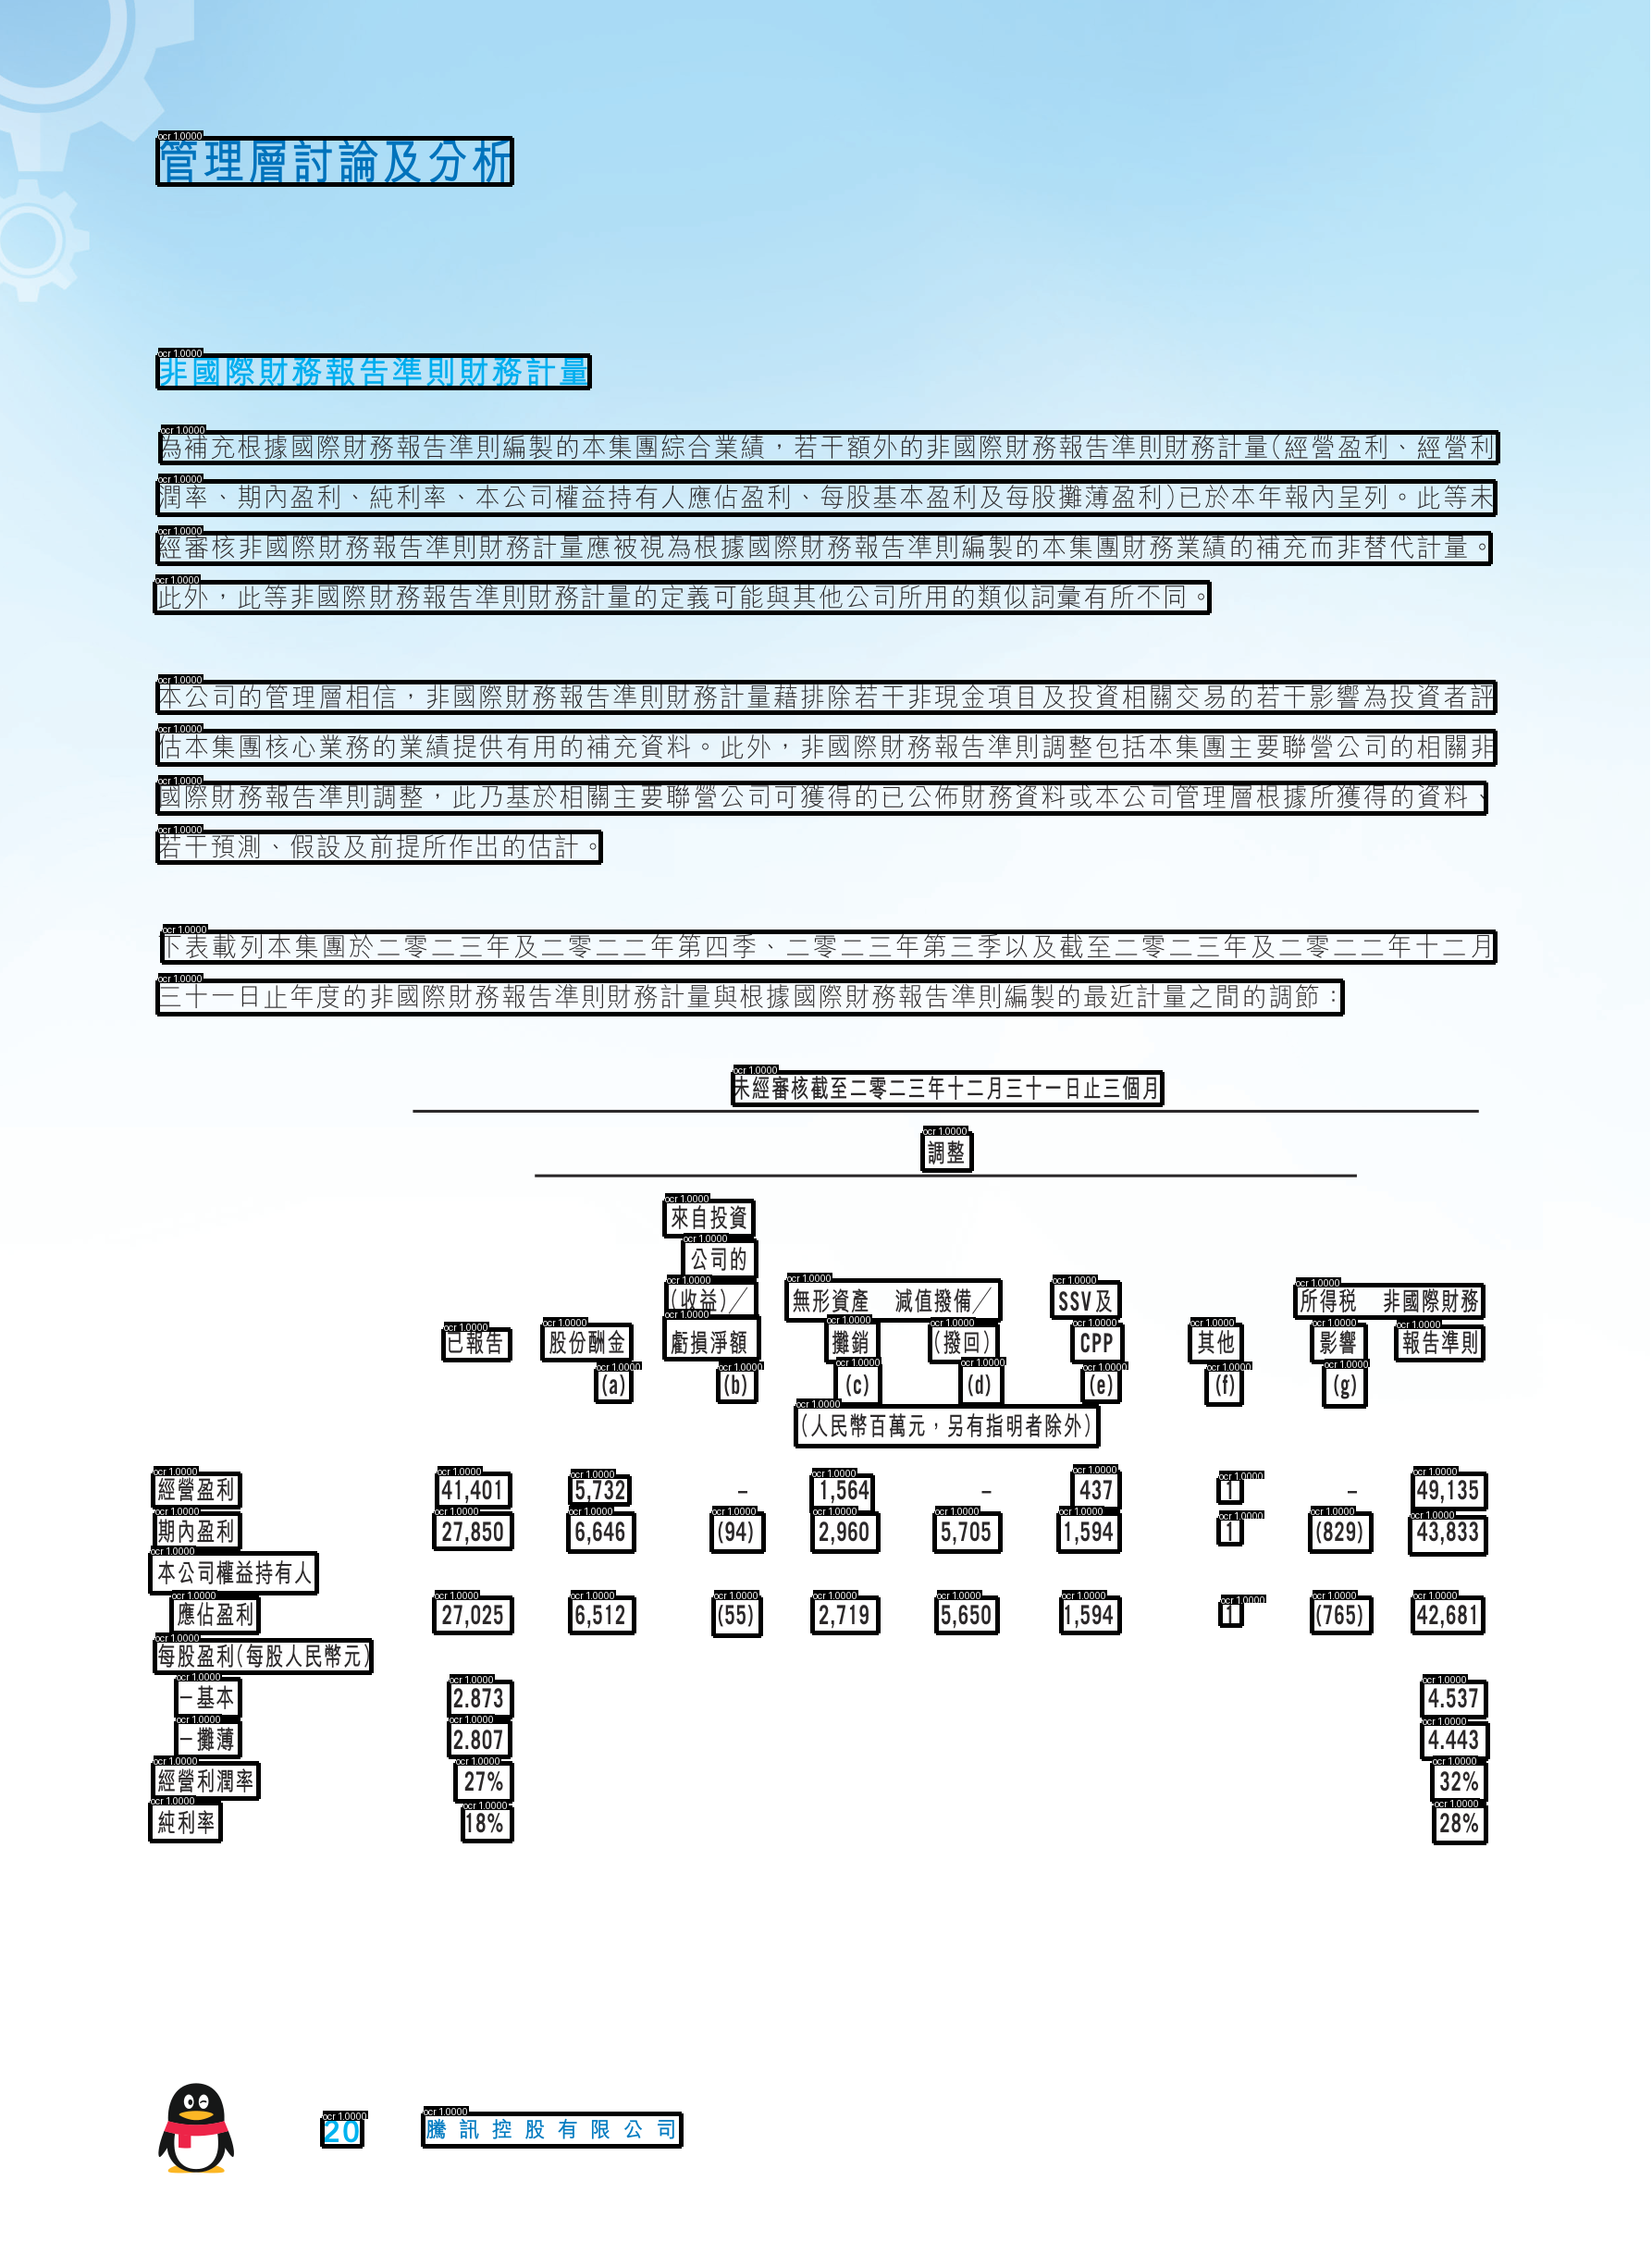

In [23]:
from pdf_utils.deepdoc.seeit import draw_box

img_draw = draw_box(img, bxs, ["ocr"], 1.)
img_draw

### 表格识别

In [23]:
from pdf_utils.deepdoc import OCR, TableStructureRecognizer

ocr = OCR()
labels = TableStructureRecognizer.labels
detr = TableStructureRecognizer()

threshold = 0.5
layouts = detr([img], float(threshold))
layouts

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

preprocess


[[{'label': 'table',
   'score': 0.8828531503677368,
   'x0': 0.822998046875,
   'x1': 1611.63916015625,
   'top': 0.48724365234375,
   'bottom': 939.8701782226562},
  {'label': 'table',
   'score': 0.8339585661888123,
   'x0': 3.1668701171875,
   'x1': 1599.2691650390625,
   'top': 1203.05322265625,
   'bottom': 2324.88818359375},
  {'label': 'table column',
   'score': 0.862404465675354,
   'x0': 566.5874633789062,
   'x1': 701.1608276367188,
   'top': 1201.510009765625,
   'bottom': 2414.095703125},
  {'label': 'table column',
   'score': 0.8623784780502319,
   'x0': 699.0255126953125,
   'x1': 834.6549072265625,
   'top': 1201.510009765625,
   'bottom': 2410.5361328125},
  {'label': 'table column',
   'score': 0.8469352126121521,
   'x0': 1479.764892578125,
   'x1': 1597.94091796875,
   'top': 1195.199462890625,
   'bottom': 2428.148193359375},
  {'label': 'table column',
   'score': 0.834102988243103,
   'x0': 833.2890014648438,
   'x1': 955.6670532226562,
   'top': 1201.510009765

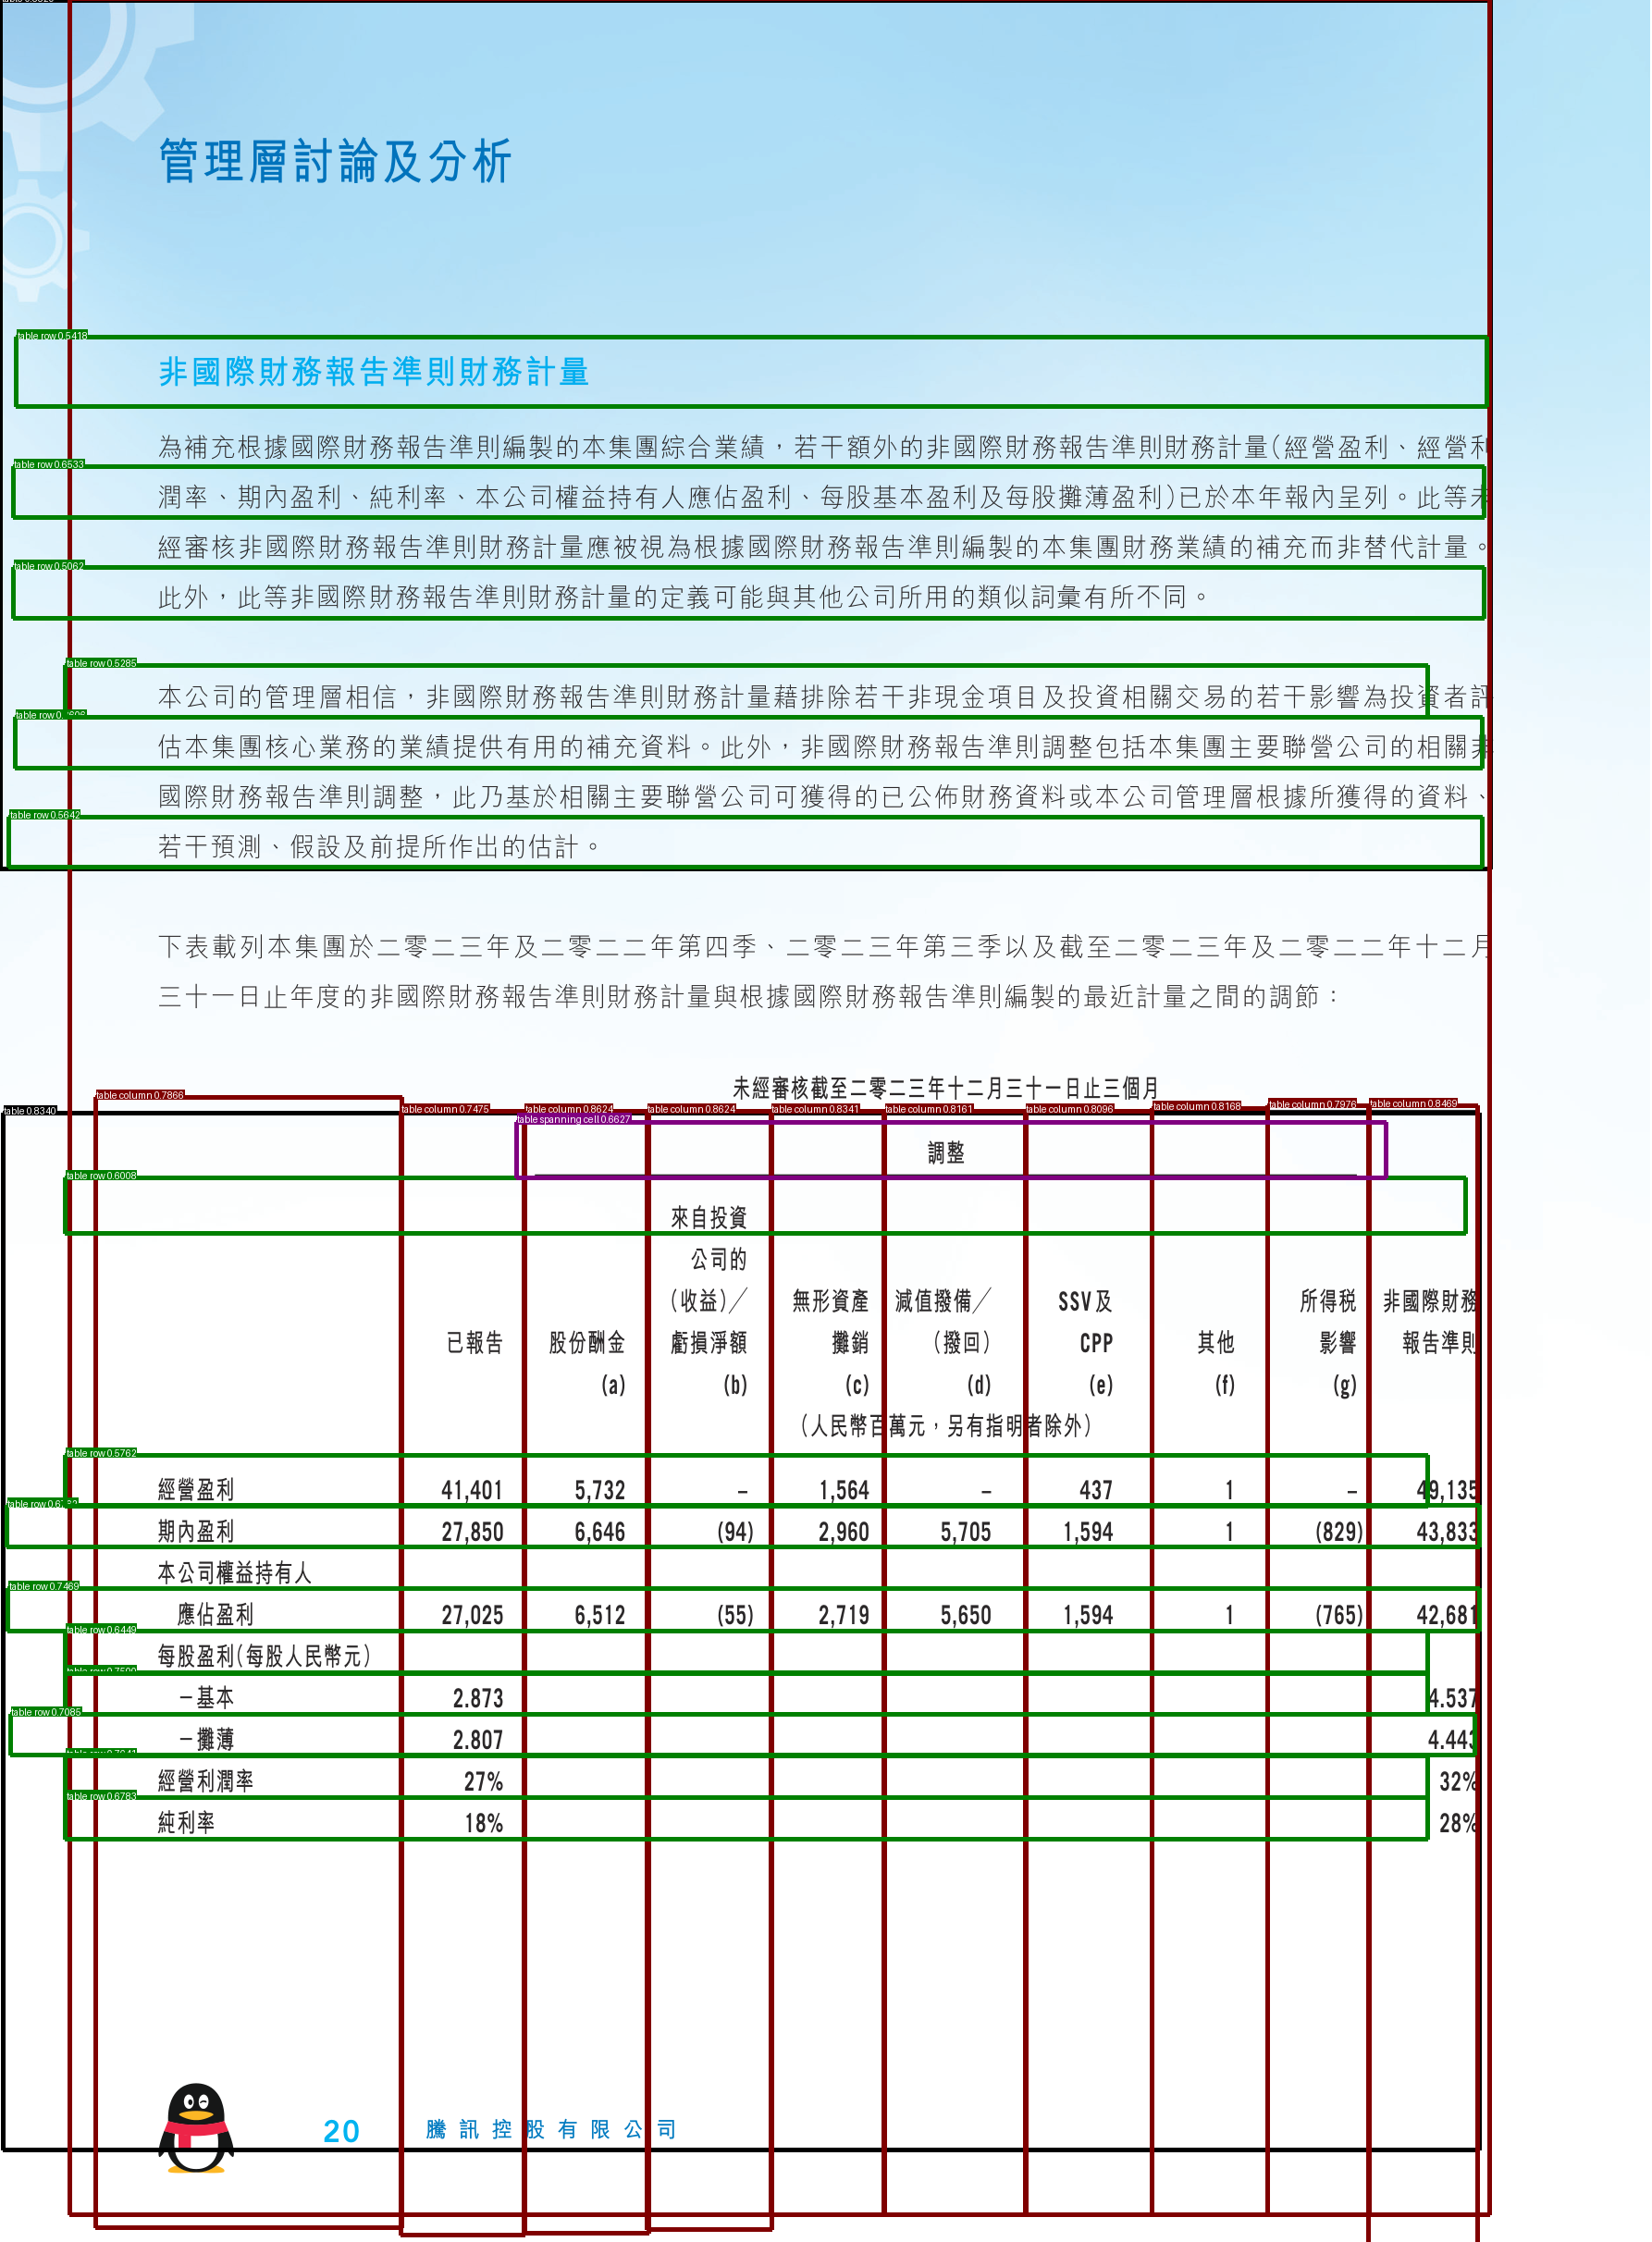

In [24]:
from pdf_utils.deepdoc.seeit import draw_box

layout_draw = [{
    "type": t["label"],
    "bbox": [t["x0"], t["top"], t["x1"], t["bottom"]],
    "score": t["score"]
} for t in layouts[0]]

img_table = draw_box(img, layout_draw, labels, float(threshold))
img_table

In [ ]:
import re
from pdf_utils.deepdoc import Recognizer

def get_table_html(img, tb_cpns, ocr):
    boxes = ocr(np.array(img))
    boxes = Recognizer.sort_Y_firstly(
        [{"x0": b[0][0], "x1": b[1][0],
          "top": b[0][1], "text": t[0],
          "bottom": b[-1][1],
          "layout_type": "table",
          "page_number": 0} for b, t in boxes if b[0][0] <= b[1][0] and b[0][1] <= b[-1][1]],
        np.mean([b[-1][1] - b[0][1] for b, _ in boxes]) / 3
    )

    def gather(kwd, fzy=10, ption=0.6):
        nonlocal boxes
        eles = Recognizer.sort_Y_firstly(
            [r for r in tb_cpns if re.match(kwd, r["label"])], fzy)
        eles = Recognizer.layouts_cleanup(boxes, eles, 5, ption)
        return Recognizer.sort_Y_firstly(eles, 0)

    headers = gather(r".*header$")
    rows = gather(r".* (row|header)")
    spans = gather(r".*spanning")
    clmns = sorted([r for r in tb_cpns if re.match(
        r"table column$", r["label"])], key=lambda x: x["x0"])
    clmns = Recognizer.layouts_cleanup(boxes, clmns, 5, 0.5)

    for b in boxes:
        ii = Recognizer.find_overlapped_with_threashold(b, rows, thr=0.3)
        if ii is not None:
            b["R"] = ii
            b["R_top"] = rows[ii]["top"]
            b["R_bott"] = rows[ii]["bottom"]

        ii = Recognizer.find_overlapped_with_threashold(b, headers, thr=0.3)
        if ii is not None:
            b["H_top"] = headers[ii]["top"]
            b["H_bott"] = headers[ii]["bottom"]
            b["H_left"] = headers[ii]["x0"]
            b["H_right"] = headers[ii]["x1"]
            b["H"] = ii

        ii = Recognizer.find_horizontally_tightest_fit(b, clmns)
        if ii is not None:
            b["C"] = ii
            b["C_left"] = clmns[ii]["x0"]
            b["C_right"] = clmns[ii]["x1"]

        ii = Recognizer.find_overlapped_with_threashold(b, spans, thr=0.3)
        if ii is not None:
            b["H_top"] = spans[ii]["top"]
            b["H_bott"] = spans[ii]["bottom"]
            b["H_left"] = spans[ii]["x0"]
            b["H_right"] = spans[ii]["x1"]
            b["SP"] = ii

    html = """
    <html>
    <head>
    <style>
    ._table_1nkzy_11 {
      margin: auto;
      width: 70%%;
      padding: 10px;
    }
    ._table_1nkzy_11 p {
      margin-bottom: 50px;
      border: 1px solid #e1e1e1;
    }

    caption {
      color: #6ac1ca;
      font-size: 20px;
      height: 50px;
      line-height: 50px;
      font-weight: 600;
      margin-bottom: 10px;
    }

    ._table_1nkzy_11 table {
      width: 100%%;
      border-collapse: collapse;
    }

    th {
      color: #fff;
      background-color: #6ac1ca;
    }

    td:hover {
      background: #c1e8e8;
    }

    tr:nth-child(even) {
      background-color: #f2f2f2;
    }

    ._table_1nkzy_11 th,
    ._table_1nkzy_11 td {
      text-align: center;
      border: 1px solid #ddd;
      padding: 8px;
    }
    </style>
    </head>
    <body>
    %s
    </body>
    </html>
""" % TableStructureRecognizer.construct_table(boxes, html=True)
    return html


html = get_table_html(img, layout_draw, ocr)
from IPython.display import display, HTML, Markdown
display(HTML(html))

## UnstructuredClient

```bash
pip install unstructured unstructured_inference unstructured_pytesseract
pip install pdf2image pdfminer.six pillow_heif pikepdf
```

### [partition_pdf](https://learn.deeplearning.ai/courses/preprocessing-unstructured-data-for-llm-applications/lesson/5/preprocessing-pdfs-and-images)

In [ ]:
# partition_pdf is too slow
# from unstructured.partition.pdf import partition_pdf

# filename = "./workspace/0700_2023.pdf"

# # pdf_elements = partition_pdf(filename=filename, strategy="fast")
# pdf_elements = partition_pdf(
#     filename=filename,
#     # Unstructured first finds embedded image blocks
#     extract_images_in_pdf=False,
#     # Use layout model (YOLOX) to get bounding boxes (for tables) and find titles
#     # Titles are any sub-section of the document
#     infer_table_structure=True,
#     # Post processing to aggregate text once we have the title
#     chunking_strategy="by_title",
#     # Chunking params to aggregate text blocks
#     # Attempt to create a new chunk 3800 chars
#     # Attempt to keep chunks > 2000 chars
#     max_characters=4000,
#     new_after_n_chars=3800,
#     combine_text_under_n_chars=2000,
#     image_output_dir_path="./images",
# )

In [ ]:
# for element in pdf_elements:
#     print(f"{element.category.upper()}: {element.text}")

In [37]:
# from typing import Any, Optional
# from pydantic import BaseModel

# # Create a dictionary to store counts of each type
# category_counts = {}

# for element in pdf_elements:
#     category = str(type(element))
#     if category in category_counts:
#         category_counts[category] += 1
#     else:
#         category_counts[category] = 1

# # Unique_categories will have unique elements
# unique_categories = set(category_counts.keys())
# print("category_counts:",category_counts)

# class Element(BaseModel):
#     type: str
#     elem: Optional[Any]

# # Categorize by type
# categorized_elements = []
# for element in pdf_elements:
#     if "unstructured.documents.elements.Table" in str(type(element)):
#         categorized_elements.append(Element(type="table", elem=element))
#     elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
#         categorized_elements.append(Element(type="text", elem=element))

# # Tables
# table_elements = [e for e in categorized_elements if e.type == "table"]
# print(len(table_elements))

# # Text
# text_elements = [e for e in categorized_elements if e.type == "text"]
# print(len(text_elements))

# table_elements[0].elem.to_dict()

category_counts: {"<class 'unstructured.documents.elements.CompositeElement'>": 2, "<class 'unstructured.documents.elements.Table'>": 1}
1
2


## [Transformer for Table Detection & Extraction](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/Table%20Transformer/Using_Table_Transformer_for_table_detection_and_table_structure_recognition.ipynb)

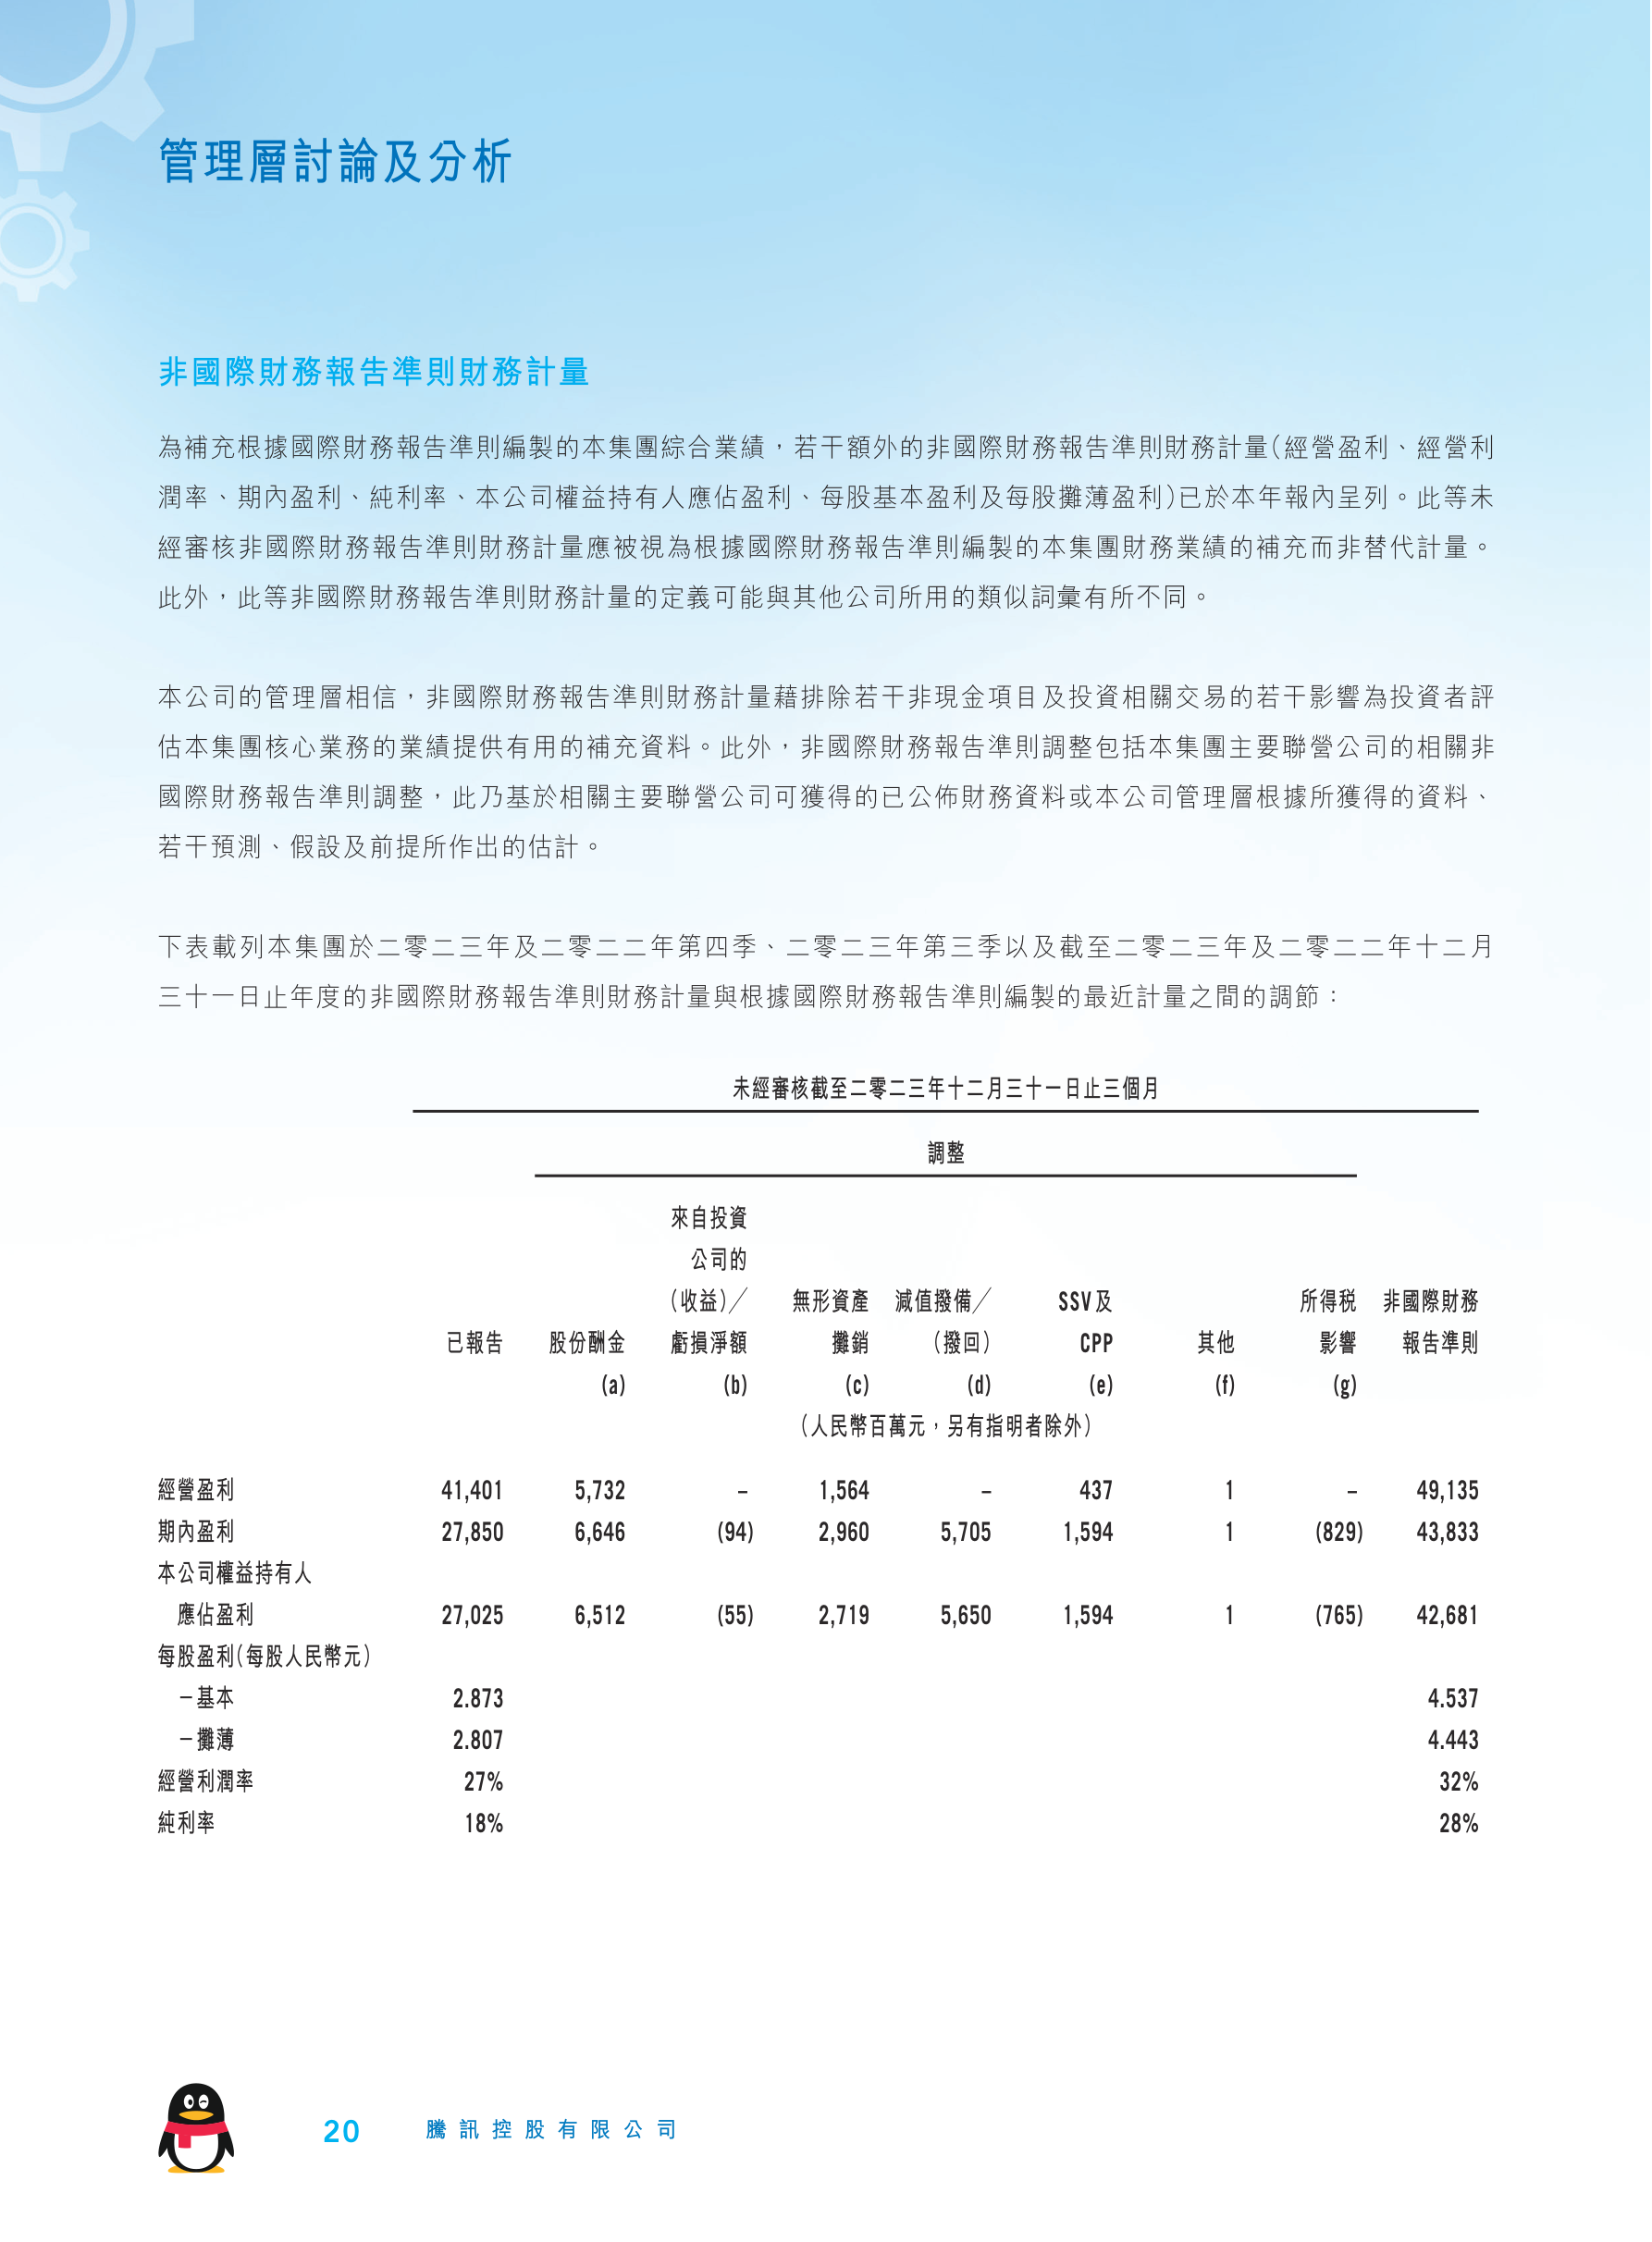

In [41]:
import fitz
from PIL import Image
import matplotlib.pyplot as plt

filename = "./workspace/0700_2023.pdf"
zoomin = 3
mat = fitz.Matrix(zoomin, zoomin)

pdf = fitz.open(filename)
for i, page in enumerate(pdf):
    pix = page.get_pixmap(matrix=mat)
    img_raw = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    if i == 20:
        break

# plt.figure(figsize=(16,9))
# plt.imshow(img_raw)
img_raw

In [42]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes, id2label):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

### table-transformer-detection

torch.Size([1, 3, 1085, 800])


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'scores': tensor([0.9930]), 'labels': tensor([0]), 'boxes': tensor([[ 173.2475, 1261.0410, 1597.9592, 1949.3904]])}


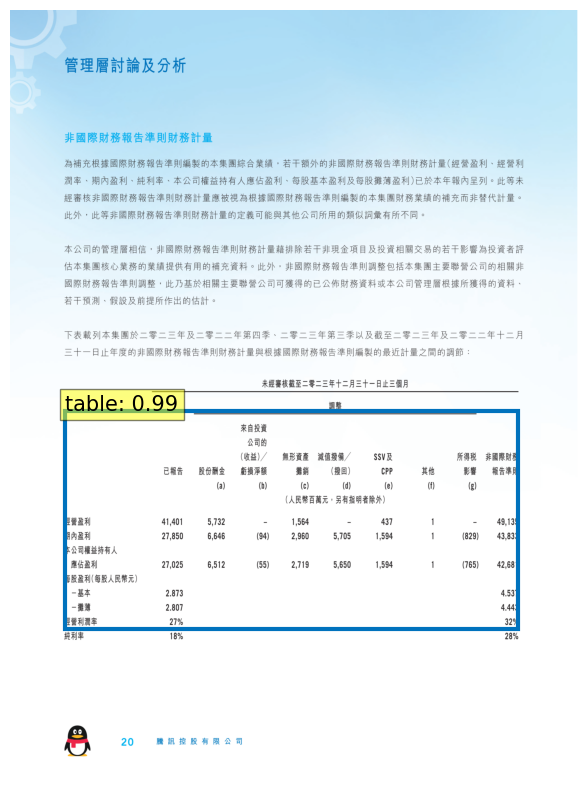

In [43]:
import torch
from transformers import DetrImageProcessor
from transformers import TableTransformerForObjectDetection

img = img_raw
feature_extractor = DetrImageProcessor()
encoding = feature_extractor(img, return_tensors="pt")
print(encoding['pixel_values'].shape)

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")
with torch.no_grad():
    outputs = model(**encoding)

# rescale bounding boxes
width, height = img.size
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
print(results)

plot_results(img, results['scores'], results['labels'], results['boxes'], model.config.id2label)

### table-transformer-structure-recognition

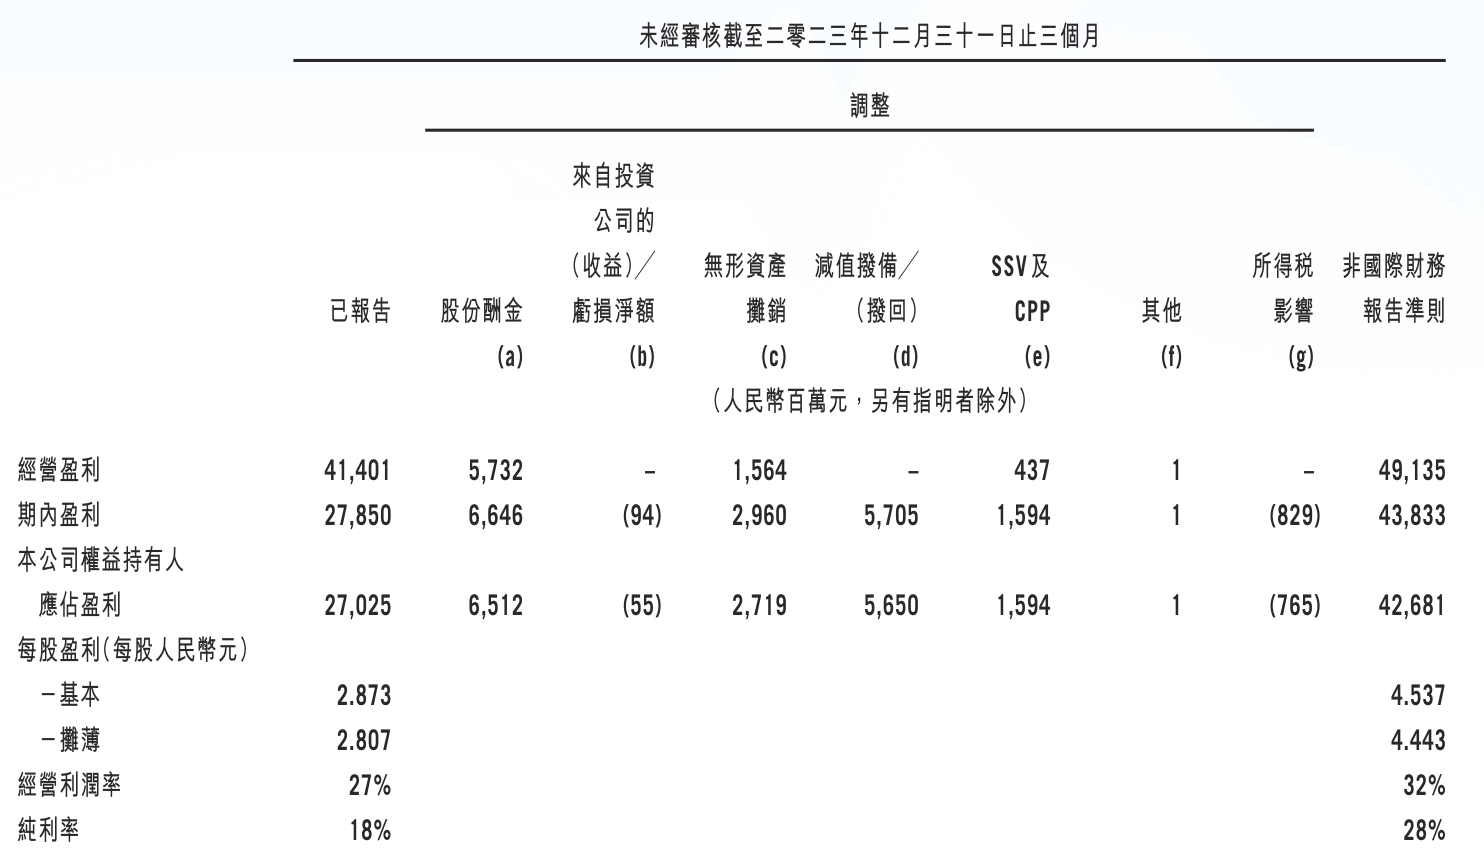

In [61]:
boxes = results['boxes'][0]

offset = (-20, -120, +40, +60)
x1, y1, x2, y2 = int(boxes[0].item())+offset[0], int(boxes[1].item())+offset[1], \
    int(boxes[2].item())+offset[2], int(boxes[3].item()+offset[3])
cropped_image = img.crop((x1, y1, x2, y2))
cropped_image

torch.Size([1, 3, 780, 1333])


Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


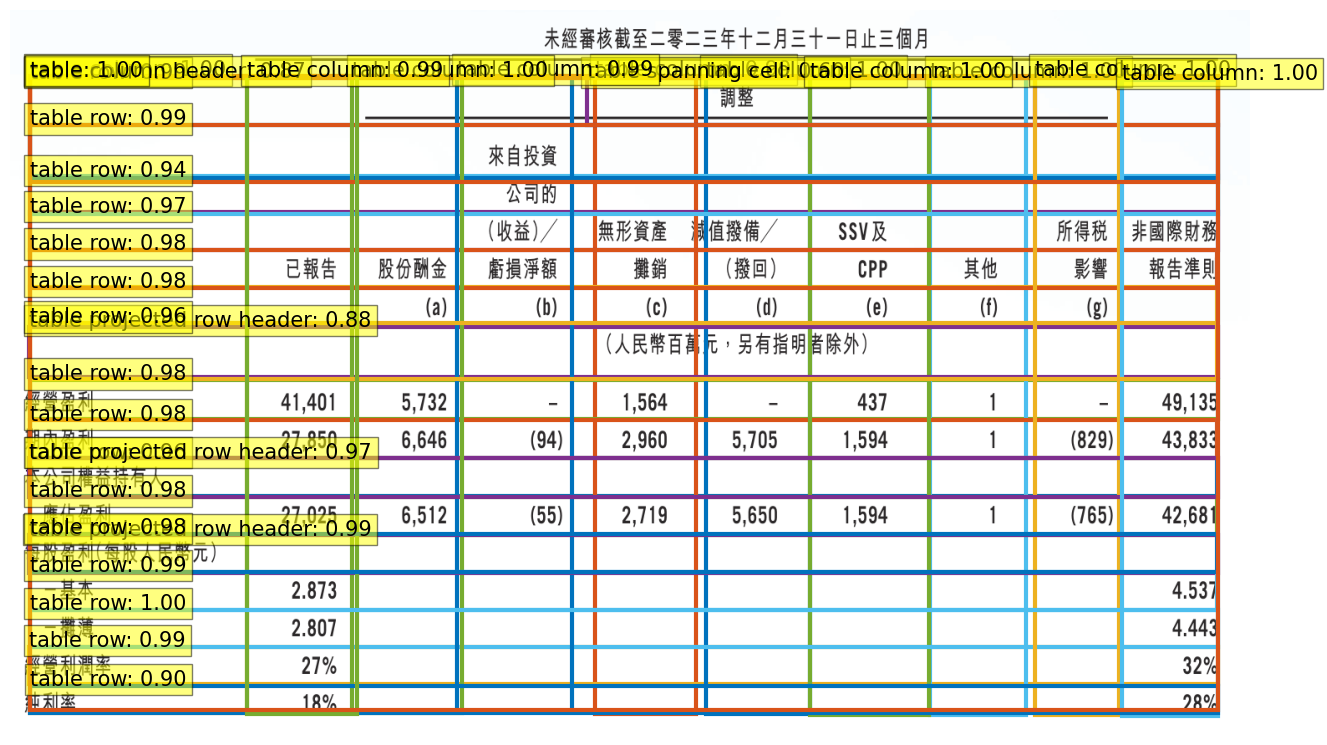

In [65]:
from transformers import DetrImageProcessor
from transformers import TableTransformerForObjectDetection

feature_extractor = DetrImageProcessor()
encoding = feature_extractor(cropped_image, return_tensors="pt")
print(encoding['pixel_values'].shape)

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")
with torch.no_grad():
    outputs = model(**encoding)
target_sizes = [cropped_image.size[::-1]]
results = feature_extractor.post_process_object_detection(outputs, threshold=0.6, target_sizes=target_sizes)[0]
plot_results(cropped_image, results['scores'], results['labels'], results['boxes'], model.config.id2label)